# Importing Libraries and loading data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("./drive/MyDrive/prices.csv")  

In [ ]:
df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


# Missing Data



In [ ]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

# Exploring Data

In [ ]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
df.groupby("symbol").count().sort_values("date")

,date,open,close,low,high,volume
symbol,,,,,,
FTV,126,126,126,126,126,126
WLTW,251,251,251,251,251,251
CSRA,284,284,284,284,284,284
HPE,304,304,304,304,304,304
KHC,378,378,378,378,378,378
...,...,...,...,...,...,...
ETFC,1762,1762,1762,1762,1762,1762
ESS,1762,1762,1762,1762,1762,1762
ESRX,1762,1762,1762,1762,1762,1762


In [ ]:
df.date

0         2016-01-05 00:00:00
1         2016-01-06 00:00:00
2         2016-01-07 00:00:00
3         2016-01-08 00:00:00
4         2016-01-11 00:00:00
                 ...         
851259             2016-12-30
851260             2016-12-30
851261             2016-12-30
851262    2016-12-30 00:00:00
851263    2016-12-30 00:00:00
Name: date, Length: 851264, dtype: object

In [ ]:
def extract_YMD(text):
  return text[:10]
df['date'] = df['date'].apply(extract_YMD)
df = df.sort_values('date')
df['date'] = pd.to_datetime(df['date'])
df

,date,symbol,open,close,low,high,volume
646,2010-01-04,SYMC,18.040001,18.400000,18.010000,18.530001,8322300.0
473,2010-01-04,IFF,41.509998,42.009998,41.500000,42.020000,286000.0
474,2010-01-04,ILMN,31.120001,30.549999,30.420000,31.230000,1793700.0
475,2010-01-04,INTC,20.790001,20.879999,20.730000,21.030001,47800900.0
476,2010-01-04,INTU,31.090000,30.809999,30.770000,31.150000,2353000.0
...,...,...,...,...,...,...,...
850922,2016-12-30,ES,55.599998,55.230000,55.070000,55.740002,1446800.0
850921,2016-12-30,EQT,65.699997,65.400002,65.050003,66.470001,1242100.0
850920,2016-12-30,EQR,63.590000,64.360001,63.189999,64.440002,1534000.0
850933,2016-12-30,EXR,75.669998,77.239998,75.110001,77.300003,884400.0


In [ ]:
df.dtypes

date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

In [ ]:
len(df.symbol.unique())

501

#EDA

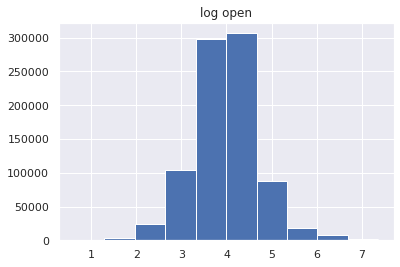

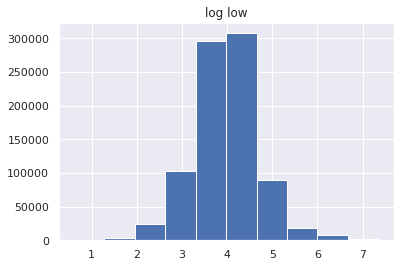

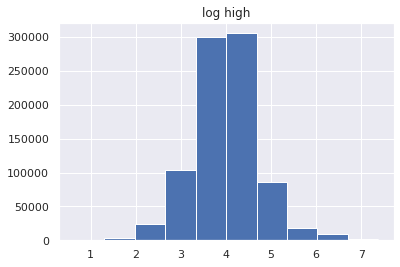

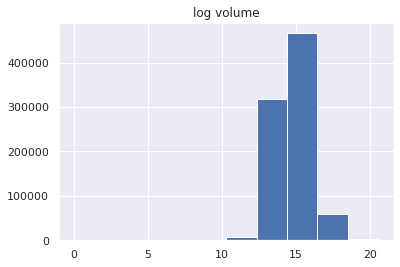

In [ ]:
cols = ['open','low','high','volume']
for i in range(len(cols)):
  _ = plt.hist(np.log(df[cols[i]]+1))
  plt.title(f'log {cols[i]}')
  plt.show()

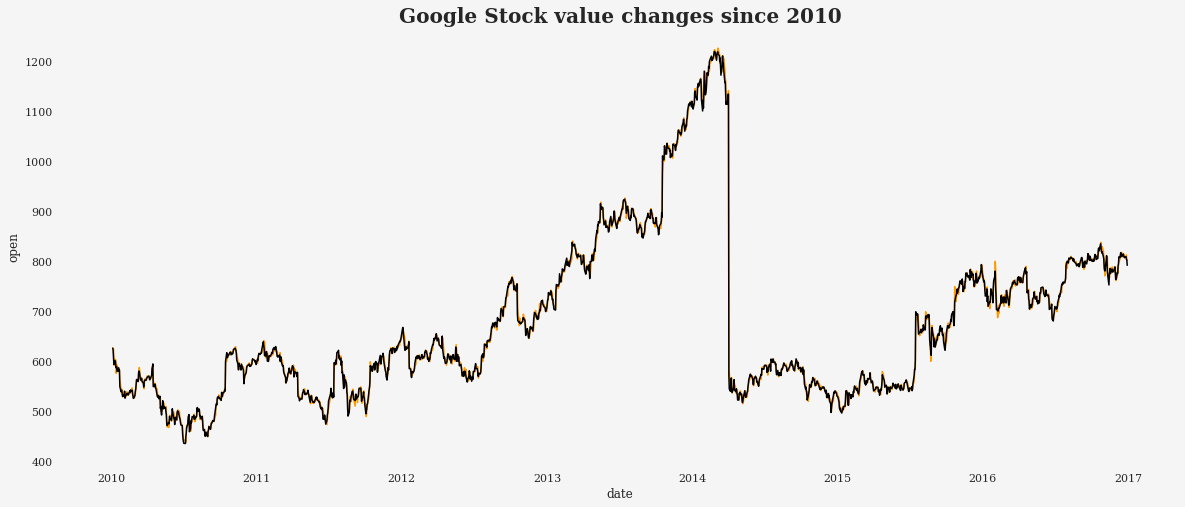

In [ ]:
df_corp = df[df['symbol']=='GOOGL']

colors = ['#FF9900','#000000']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})

fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df_corp, x='date',y='open')
ax=sns.lineplot(data=df_corp, x='date',y='close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

_ = plt.title("Google Stock value changes since 2010", size=20, weight='bold')

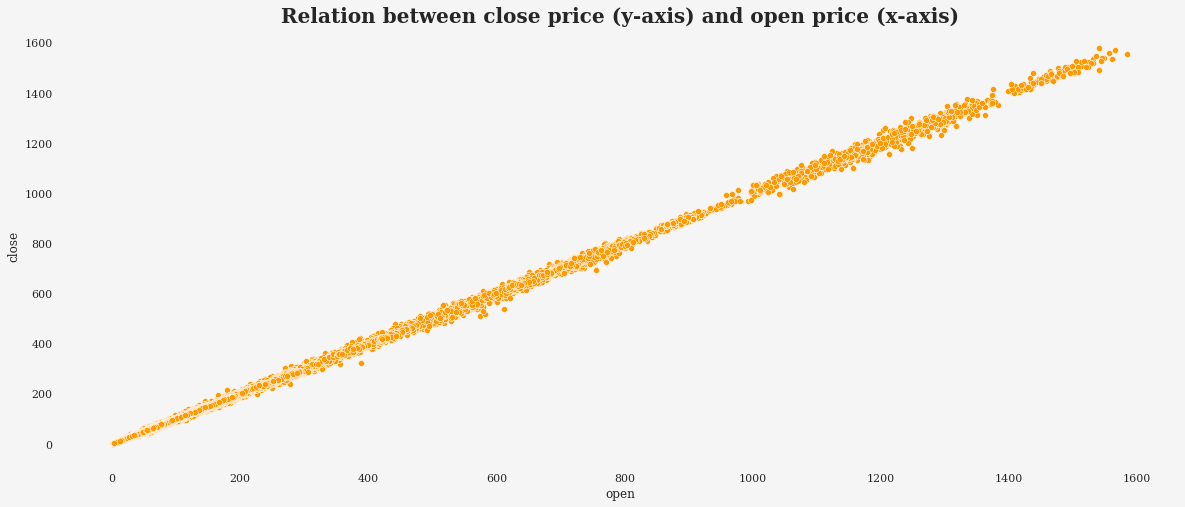

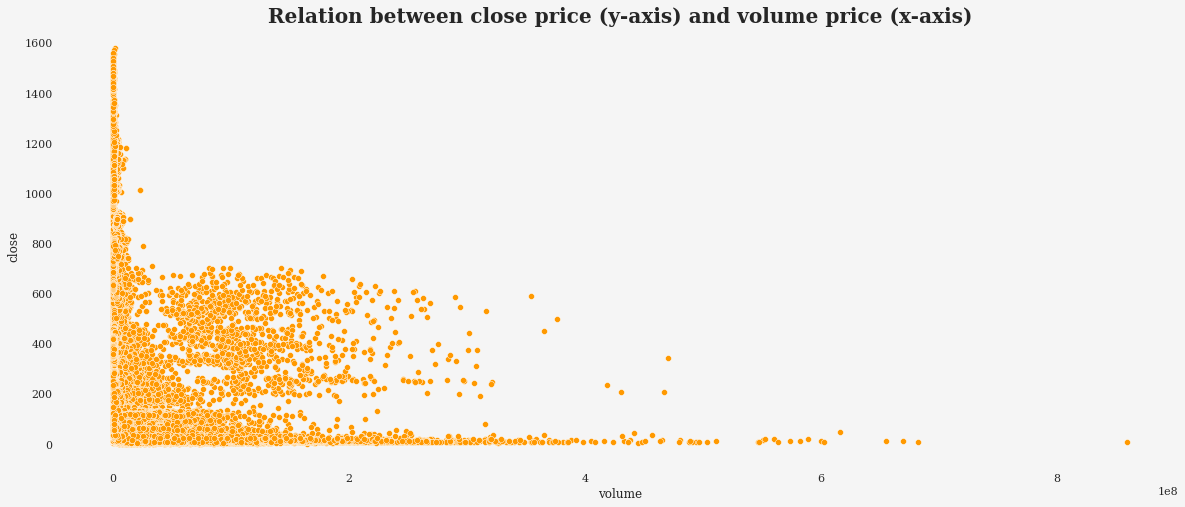

In [ ]:
colors = ['#FF9900','#000000']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
for x_ in ['open', 'volume']:
  fig=plt.figure(figsize=(20,8))
  ax=sns.scatterplot(data=df, x=x_,y='close')
  for s in ['left','right','top','bottom']:
      ax.spines[s].set_visible(False)

  _ = plt.title(f"Relation between close price (y-axis) and {x_} price (x-axis)", size=20, weight='bold')
  plt.show()
  print('\n')

# Modeling

> ## Linear Regression For each Corporation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config

# This dictionary should hold the mse of each corporation based on the model's predictions
linear_reg_dict_mse = {}

# Fitting simple linear model to each corporation data
for symbol in df.symbol.unique():
  # Date is not added as the info it offers is already provided by the other features
  X=df[df['symbol'] == symbol][['open','volume']]
  y=df[df['symbol'] == symbol]['close']

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  model = LinearRegression()
  model.fit(X_train,y_train)

  pred = model.predict(X_test)
  mse=np.round(mean_squared_error(y_test,pred),2)

  linear_reg_dict_mse[symbol] = mse

In [ ]:
print('The average Test set MSE for all the corporations: ',np.round(np.mean(list(linear_reg_dict_mse.values())),2))

The average Test set MSE for all the corporations:  2.89


> This Model will require to provide the open price and the volume at the beginning of the day to get a rough estimate of the closing price.
The shortcomings of this model is that it cannot predict the next day price for example and it does not rely on the past close prices in its prediction, we get over that using LSTM
 

# LSTM For 'JEC' Stock price prediction

In [ ]:
close_price = df[df['symbol']=='JEC']['close'].to_numpy()

In [ ]:
len(close_price)

1762

In [ ]:
x_train = close_price[:1200]
x_test = close_price[1200:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
x_train = sc.fit_transform(x_train.reshape(-1,1))
x_test = sc.transform(x_test.reshape(-1,1))

In [ ]:
# we will use the values of the past 50 days to predict the following day
length = 50
x_train_50 = []
y_train_50 = []
for i in range(length, len(x_train)):
    x_train_50.append(x_train[i-length:i])
    y_train_50.append(x_train[i])
x_train_50, y_train_50 = np.array(x_train_50), np.array(y_train_50)

x_test_50 = []
y_test_50 = []
for i in range(length, len(x_test)):
    x_test_50.append(x_test[i-length:i])
    y_test_50.append(x_test[i])
x_test_50, y_test_50 = np.array(x_test_50), np.array(y_test_50)

In [ ]:
print("Training Features Matrix: ",x_train_50.shape)
print("Training Target Matrix: ",y_train_50.shape)
print("Testing Features Matrix: ",x_test_50.shape)
print("Testing Target Matrix: ",y_test_50.shape)

Training Features Matrix:  (1150, 50, 1)
Training Target Matrix:  (1150, 1)
Testing Features Matrix:  (512, 50, 1)
Testing Target Matrix:  (512, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras import losses
from keras import metrics
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train_50.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer='adam',
              loss=losses.MeanSquaredError(name="mean_squared_error"),
              metrics=[metrics.MeanSquaredError(name="mean_squared_error")])

# Fitting the RNN to the Training set
history = model.fit(x_train_50, y_train_50, validation_data=(x_test_50,y_test_50),epochs = 10, batch_size = 32, verbose = 1)

Epoch 1/10
36/36 [==============================] - 38s 58ms/step - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 2/10
36/36 [==============================] - 1s 15ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 3/10
36/36 [==============================] - 1s 14ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 4/10
36/36 [==============================] - 1s 15ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 5/10
36/36 [==============================] - 1s 15ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 6/10
36/36 [==============================] - 1s 14ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 7/10
36/36 [===============

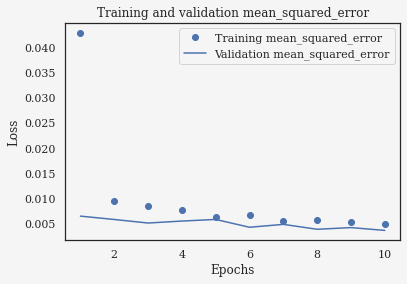

In [ ]:
import matplotlib.pyplot as plt
plt.clf()   # clear figure
mse_values = history.history['mean_squared_error']
val_mse_values = history.history['val_mean_squared_error']

epochs = range(1, len(mse_values) + 1)

plt.plot(epochs, mse_values, 'bo', label='Training mean_squared_error')
plt.plot(epochs, val_mse_values, 'b', label='Validation mean_squared_error')
plt.title('Training and validation mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Comparing the validation mse 0.0037 with the linear regression mse 
linear_reg_dict_mse['JEC']

0.41

# Conv1D

In [ ]:
print("Training Features Matrix: ",x_train_50.shape)
print("Training Target Matrix: ",y_train_50.shape)
print("Testing Features Matrix: ",x_test_50.shape)
print("Testing Target Matrix: ",y_test_50.shape)

Training Features Matrix:  (1150, 50, 1)
Training Target Matrix:  (1150, 1)
Testing Features Matrix:  (512, 50, 1)
Testing Target Matrix:  (512, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical, plot_model

n_timesteps, n_features, n_outputs = x_train_50.shape[1], x_train_50.shape[2], y_train_50.shape[1]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# fit network
history = model.fit(x_train_50, y_train_50,validation_data=(x_test_50,y_test_50) , epochs=20, batch_size=32, verbose=1)

Epoch 1/20
36/36 [==============================] - 1s 8ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 2/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 3/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 4/20
36/36 [==============================] - 0s 4ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 5/20
36/36 [==============================] - 0s 4ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 6/20
36/36 [==============================] - 0s 4ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 7/20
36/36 [======================

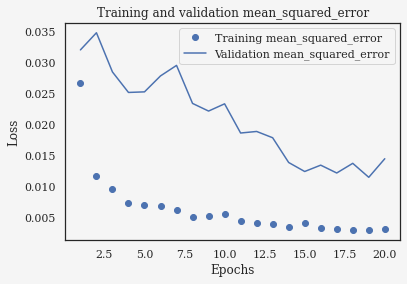

In [ ]:
plt.clf()   # clear figure
mse_values = history.history['mean_squared_error']
val_mse_values = history.history['val_mean_squared_error']

epochs = range(1, len(mse_values) + 1)

plt.plot(epochs, mse_values, 'bo', label='Training mean_squared_error')
plt.plot(epochs, val_mse_values, 'b', label='Validation mean_squared_error')
plt.title('Training and validation mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Multi-headed CNN1D

In [ ]:
print("Training Features Matrix: ",x_train_50.shape)
print("Training Target Matrix: ",y_train_50.shape)
print("Testing Features Matrix: ",x_test_50.shape)
print("Testing Target Matrix: ",y_test_50.shape)

Training Features Matrix:  (1150, 50, 1)
Training Target Matrix:  (1150, 1)
Testing Features Matrix:  (512, 50, 1)
Testing Target Matrix:  (512, 1)


In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

n_timesteps, n_features, n_outputs = x_train_50.shape[1], x_train_50.shape[2], y_train_50.shape[1]
# head 1
inputs1 = Input(shape=(n_timesteps,n_features))
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)
# head 2
inputs2 = Input(shape=(n_timesteps,n_features))
conv2 = Conv1D(filters=64, kernel_size=5, activation='relu')(inputs2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)
# head 3
inputs3 = Input(shape=(n_timesteps,n_features))
conv3 = Conv1D(filters=64, kernel_size=11, activation='relu')(inputs3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)
# merge
merged = concatenate([flat1, flat2, flat3])
# interpretation
dense1 = Dense(100, activation='relu')(merged)
outputs = Dense(n_outputs)(dense1)
model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# fit network
history = model.fit([x_train_50,x_train_50,x_train_50], y_train_50,
                    validation_data=([x_test_50,x_test_50,x_test_50], y_test_50), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
36/36 [==============================] - 1s 9ms/step - loss: 0.1308 - mean_squared_error: 0.1308 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 2/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 3/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 4/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 5/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 6/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 7/20
36/36 [======================

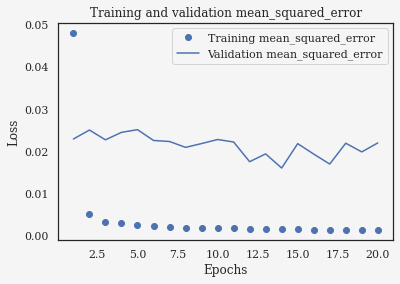

In [ ]:
plt.clf()   # clear figure
mse_values = history.history['mean_squared_error']
val_mse_values = history.history['val_mean_squared_error']

epochs = range(1, len(mse_values) + 1)

plt.plot(epochs, mse_values, 'bo', label='Training mean_squared_error')
plt.plot(epochs, val_mse_values, 'b', label='Validation mean_squared_error')
plt.title('Training and validation mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Among:


1.   Linear Regression using open price and volume
2.   LSTM using close price of the past 50 days to predict the 51

1.   Conv1D using kernels of size 3
2.   Multi-headed CNN1D using kernel (3,5,11) 

The LSTM performed the best



